# Week 2

Notebook content based on the Coursera online course "Julia Scientific Programming"

This week we will learn how to load and analyze a data set. The data set we will use will be data about the spread of the Ebola virus between the years 2014 and 2015.

## Reading in data and reformatting data

In [73]:
#=
The data is stored in the file "wikipediaEVDraw.csv" in the current directory (the directory of this notebook file). We read the data into Julia using the "readdlm" ("read delimited file") indicating the delimiter between fields as a parameter to the function.
=#

wikiEVDraw = readdlm("wikipediaEVDraw.csv", ',')

54×10 Array{Any,2}:
 "11/25/15"  28637  11314  3804  2536  …  14122     3955     "[note 1][13]"
 "11/18/15"  28634  11314  3804  2536     14122     3955     "[note 2][14]"
 "11/11/15"  28635  11314  3805  2536     14122     3955     "[note 3][15]"
 "11/04/15"  28607  11314  3810  2536     14089     3955     "[note 4][16]"
 "10/25/15"  28539  11298  3806  2535     14061     3955     "[note 5][17]"
 "10/18/15"  28476  11298  3803  2535  …  14001     3955     "[18]"        
 "10/11/15"  28454  11297  3800  2534     13982     3955     "[note 6][19]"
 "09/27/15"  28388  11296  3805  2533     13911     3955     "[20]"        
 "09/20/15"  28295  11295  3800  2532     13823     3955     "[21]"        
 "09/13/15"  28220  11291  3792  2530     13756     3953     "[22]"        
 "09/06/15"  28147  11291  3792  2530  …  13683     3953     "[23]"        
 "08/30/15"  28073  11290  3792  2529     13609     3953     "[24]"        
 "08/16/15"  27952  11284  3786  2524     13494     3952     "[25]" 

In [74]:
#=
We see that the first column of our "wikiEVDraw" data, representing dates at which the data were reported, are of type String; We would like them to be of Date type, so need to convert them.

To do the conversion, we use the 'DateTime' function, passing in the date string to be converted and a string indicating the format of the date string.
=#

# Example:

println(wikiEVDraw[1,1])

DateTime(wikiEVDraw[1,1], "mm/dd/yy") + Dates.Year(2000)

11/25/15


2015-11-25T00:00:00

To convert our date strings into Date objects, we will use a "for loop"

In [75]:
# Example "for loop"

for num = 3:7
    println("num is now $num")
end

num is now 3
num is now 4
num is now 5
num is now 6
num is now 7


In [76]:
# Example "for loop"

values = [23, "my name is not a name", 'ℵ']

for x in values  # a loop can iterate over an array
    println("The value of x is now $x")
end

The value of x is now 23
The value of x is now my name is not a name
The value of x is now ℵ


In [77]:
#=
Create an array of data in column 1 of the "wikiEVDraw" data
=#

col1 = wikiEVDraw[:, 1]

54-element Array{Any,1}:
 "11/25/15"
 "11/18/15"
 "11/11/15"
 "11/04/15"
 "10/25/15"
 "10/18/15"
 "10/11/15"
 "09/27/15"
 "09/20/15"
 "09/13/15"
 "09/06/15"
 "08/30/15"
 "08/16/15"
 ⋮         
 "08/09/14"
 "07/30/14"
 "07/23/14"
 "07/14/14"
 "07/02/14"
 "06/17/14"
 "05/27/14"
 "05/12/14"
 "05/01/14"
 "04/14/14"
 "03/31/14"
 "03/22/14"

In [78]:
#=
Loop through each element (date string) in the "col1" array and convert it to a Date object
=#

for i = 1:length(col1)
    col1[i] = DateTime(col1[i], "mm/dd/yy") + Dates.Year(2000)
end

In [79]:
#=
Examine the converted date strings (now Date objects) in the "col1" array
=#

col1[1:10]

10-element Array{Any,1}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00

Next we want to measure the date from the start of the epidemic on March 22, 2014. We will use the "Dates.datetime2rata" function to do this.

This function returns the number of days from Jan 1, 0001 to the Date object passed in as an argument to the function.

In [80]:
Dates.datetime2rata(col1[1])

735927

In [81]:
#=
The function "dayssincemar22" returns the number of days between the input Date object and March 22, 2014 (the date in the Date array "col1" at col1[54]). The date March 22, 2014 is the date at which ebola outbreak data started to be recorded.

the array "epidays" holds the number of days since March 22, 2014 for the corresponding dates stored in the "col1" array; epidays[i] is the number of days since March 22, 2014 for the col1[i] entry.
=#


dayssincemar22(x) = Dates.datetime2rata(x) - Dates.datetime2rata(col1[54])

epidays = Array{Int64}(54)
for i = 1:54
    epidays[i] = dayssincemar22(col1[i])
end

In [82]:
for i = 1:5
    println("date: $(col1[i]), days since outbreak: $(epidays[i])")
end

date: 2015-11-25T00:00:00, days since outbreak: 613
date: 2015-11-18T00:00:00, days since outbreak: 606
date: 2015-11-11T00:00:00, days since outbreak: 599
date: 2015-11-04T00:00:00, days since outbreak: 592
date: 2015-10-25T00:00:00, days since outbreak: 582


Next we replace column 1 of our data array "wikiEVDraw" (which currently contains Date objects) with the "epidays" array (which contains the days since March 22, 2014). We then save the result into a new array, so as to preserve the original data.

In [83]:
wikiEVDraw[:, 1] = epidays

# The ',' parameter is needed since the default is 'tab'
writedlm("wikipediaEVDdatesconverted.csv", wikiEVDraw, ',')

In [84]:
# Examine the converted data array "wikiEVDraw"
wikiEVDraw

54×10 Array{Any,2}:
 613  28637  11314  3804  2536  …  14122     3955     "[note 1][13]"
 606  28634  11314  3804  2536     14122     3955     "[note 2][14]"
 599  28635  11314  3805  2536     14122     3955     "[note 3][15]"
 592  28607  11314  3810  2536     14089     3955     "[note 4][16]"
 582  28539  11298  3806  2535     14061     3955     "[note 5][17]"
 575  28476  11298  3803  2535  …  14001     3955     "[18]"        
 568  28454  11297  3800  2534     13982     3955     "[note 6][19]"
 554  28388  11296  3805  2533     13911     3955     "[20]"        
 547  28295  11295  3800  2532     13823     3955     "[21]"        
 540  28220  11291  3792  2530     13756     3953     "[22]"        
 533  28147  11291  3792  2530  …  13683     3953     "[23]"        
 526  28073  11290  3792  2529     13609     3953     "[24]"        
 512  27952  11284  3786  2524     13494     3952     "[25]"        
   ⋮                            ⋱                                   
 140   1835   

## Plotting data using the "Plots" package

In [85]:
# Load the "Plots" package with "using"
using Plots

In [86]:
# Specify the "pyplot" backend for the "Plots" package
pyplot()

Plots.PyPlotBackend()

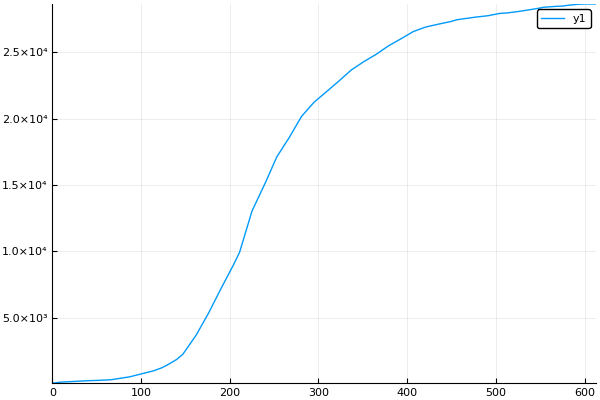

In [87]:
# Make a plot using data from array "EVData"

EVData = readdlm("wikipediaEVDdatesconverted.csv", ',')
epidays = EVData[:, 1] # ':' means all entries in all rows for the specified column
allcases = EVData[:, 2]

plot(epidays, allcases)

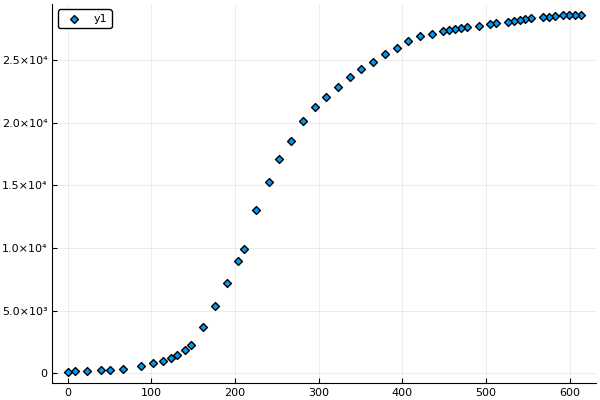

In [88]:
# Change the format of the plot using keyword arguments
plot(epidays, allcases, linetype = :scatter, marker = :diamond)

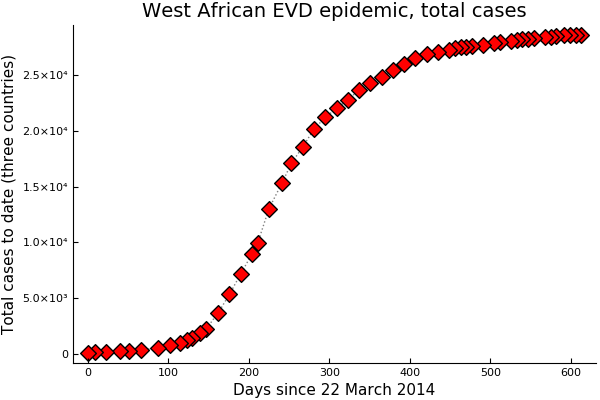

In [89]:
#= Next let's add a title, labels to the axes, tweak the marker, add a light curve through the data and remove the grid =#

plot(epidays, allcases,
title       = "West African EVD epidemic, total cases",
xlabel      = "Days since 22 March 2014",
ylabel      = "Total cases to date (three countries)",
marker      = (:diamond, :red, 8),
line        = (:path, :dot, :grey),
legend      = false,
grid        = false)

In [90]:
# Save the current plot in different formats using the "savefig" function

savefig("WAfricanEVD_noformatspecified") # no extension, saved as .png
savefig("WAfricanEVD.pdf")
savefig("WAfricanEVD.png")

## Plotting multiple curves

Some of the data in our ebola dataset is missing (see below), so we will need a way of handling these situations. We will see one way of doing this below using "if" statements and "for" loops.

    87  528  337  398   264   97   49   "[71]"        
    66  309  202  281   186   16    5   "[72]"        
    51  260  182  248   171   "–"  "–"  "[73][74]"    
    40  239  160  226   149   "-"  "-"  "[75]"        
    23  176  110  168   108   "–"  "–"  "[76]"        
    9   130   82  122    80   "–"  "–"  "[77]"        
    0    49   29   49    29   "–"  "–"  "[78]"        

In [91]:
# Example of using an "if" statement

a = rand() # Assign a random number between 0 and 1 to "a"

println("'a' now has the value $a")
if a > 0.5
    println("this is quite a large value")
end

'a' now has the value 0.04649049954775797


In [92]:
# Using the previous code in a "for" loop

for k = 1:8
    a = rand()
    println("'a' now has the value $a")
    if a > 0.5
        println("this is quite a large value")
    end
end

'a' now has the value 0.9837656260562435
this is quite a large value
'a' now has the value 0.39515591907582337
'a' now has the value 0.3656838154270161
'a' now has the value 0.6764442404928501
this is quite a large value
'a' now has the value 0.7724159940138966
this is quite a large value
'a' now has the value 0.6822794293617316
this is quite a large value
'a' now has the value 0.046191801411929356
'a' now has the value 0.4178876298018783


We will loop over the data values, testing whether the data values can be read as a number using the "isnumber()" function. If "isnumber(elem)" evaluates to "false", we will replace "elem" with 0 (we could also use "NaN").

The function "isnumber()" requires a string as argument, so we will convert its arguments into strings using the "string()" function.

In [93]:
re = r">=(\d)\,(\d+)"
ismatch(re,">=2,345")

true

In [99]:
all(isnumber,EVData[27,6])

false

In [95]:
#=
Some of the data in the EVData array are of the form "≥2,345" and "-" where only estimates were possible or data wasn't collected, respectively. For the first type we want to replace the "≥2,345" with "2345" and for the second type we want to replace "-" with 0. We use regular expression matching to handle the first case; Anything else will get replaced with 0.
=#

re = r"≥(\d)\,(\d+)"
rows, cols = size(EVData)
for j = 1:cols
    for i = 1:rows # This order goes down one column at a time
        if all(isnumber, string(EVData[i,j]))
            if ismatch(re, string(EVData[i,j]))
                m = match(re, string(EVData[i,j]))
                println(m)
#                 EVData[i,j] = parse("$(m.captures[1])$(m.captures[2])")
            else
#                 EVData[i,j] = 0
            end
        end
    end
end

In [100]:
?all

search: all all! allunique @allocated ccall finally showall closeall UnionAll



```
all(itr) -> Bool
```

Test whether all elements of a boolean collection are `true`, returning `false` as soon as the first `false` value in `itr` is encountered (short-circuiting).

```jldoctest
julia> a = [true,false,false,true]
4-element Array{Bool,1}:
  true
 false
 false
  true

julia> all(a)
false

julia> all((println(i); v) for (i, v) in enumerate(a))
1
2
false
```

```
all(p, itr) -> Bool
```

Determine whether predicate `p` returns `true` for all elements of `itr`, returning `false` as soon as the first item in `itr` for which `p` returns `false` is encountered (short-circuiting).

```jldoctest
julia> all(i->(4<=i<=6), [4,5,6])
true

julia> all(i -> (println(i); i < 3), 1:10)
1
2
3
false
```

```
all(A, dims)
```

Test whether all values along the given dimensions of an array are `true`.

```jldoctest
julia> A = [true false; true true]
2×2 Array{Bool,2}:
 true  false
 true   true

julia> all(A, 1)
1×2 Array{Bool,2}:
 true  false

julia> all(A, 2)
2×1 Array{Bool,2}:
 false
  true
```


In [71]:
# Check the last few rows of EVData to see how it worked

EVData[end-9:end, :]

10×10 Array{Any,2}:
 0  0  0  0  0  0     0     0     0     "[68]"    
 0  0  0  0  0  0     0     0     0     "[69]"    
 0  0  0  0  0  0     0     0     0     "[70]"    
 0  0  0  0  0  0     0     0     0     "[71]"    
 0  0  0  0  0  0     0     0     0     "[72]"    
 0  0  0  0  0  0     0      "–"   "–"  "[73][74]"
 0  0  0  0  0  0     0      "-"   "-"  "[75]"    
 0  0  0  0  0  0     0      "–"   "–"  "[76]"    
 0  0  0  0  0  0     0      "–"   "–"  "[77]"    
 0  0  0  0  0   "–"   "–"   "–"   "–"  "[78]"    

Now we plot the data for several different countries on the same plot.

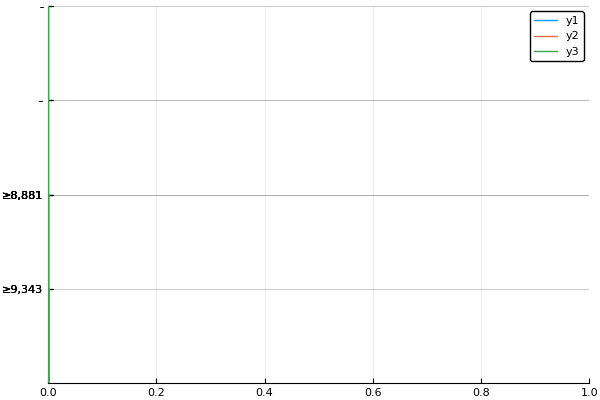

In [72]:
# Extract the data
epidays = EVData[:,1] # Days since recording began
EVDcasesbycountry = EVData[:, [4,6,8]] # All rows, cols 4,6,8

using Plots
pyplot()
plot(epidays, EVDcasesbycountry)


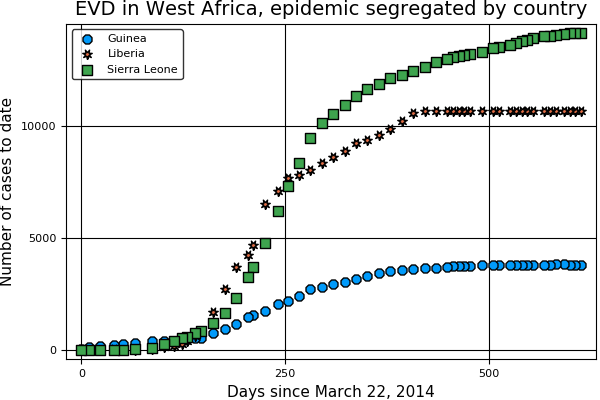

In [65]:
# Customize the plot

plot(epidays, EVDcasesbycountry,
legend = :topleft,
marker = ([:octagon :star7 :square], 7),
label  = ["Guinea" "Liberia" "Sierra Leone"],
title  = "EVD in West Africa, epidemic segregated by country",
xlabel = "Days since March 22, 2014",
ylabel = "Number of cases to date",
line   = (:scatter))

In [64]:
savefig("WAfricanEVDbycountry.png")